### Задание 1

In [1]:
# Импортируйте библиотеки pandas, numpy и matplotlib.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
# Создайте датафреймы X и y из этих данных.

# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
# с помощью функции train_test_split так, чтобы размер тестовой выборки 
# составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

# Масштабируйте данные с помощью StandardScaler.

# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.

# Постройте диаграмму рассеяния на этих данных.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
data = boston.data
feature_names = boston.feature_names
target = boston.target

In [5]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [16]:
X_test_scaled = scaler.transform(X_test)

In [17]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687


In [18]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [20]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

In [21]:
X_train_tsne.shape

(404, 2)

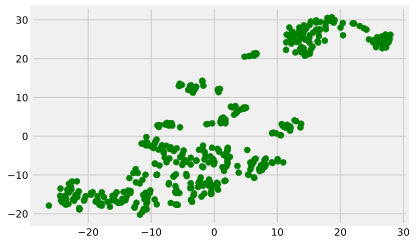

In [22]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], color='green')

### Задание 2

In [23]:
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
# используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
# и раскрасьте точки из разных кластеров разными цветами.

# Вычислите средние значения price и CRIM в разных кластерах.

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [26]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [27]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Text(15, 15, 'Кластер 2')

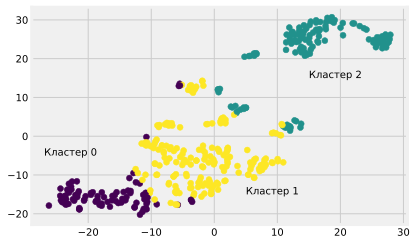

In [28]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-27, -5, 'Кластер 0')
plt.text(5, -15, 'Кластер 1')
plt.text(15, 15, 'Кластер 2')

In [29]:
y_train.mean()

price    22.796535
dtype: float64

In [30]:
y_train[labels_train==0].mean()

price    27.788372
dtype: float64

In [31]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [32]:
y_train[labels_train==2].mean()

price    24.958115
dtype: float64

In [33]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [34]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [35]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

Text(0.5, 0, 'CRIM')

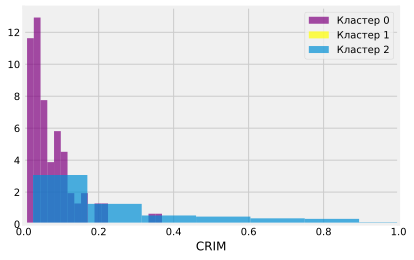

In [36]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins = 20, density = True, alpha = 0.7, color='purple')
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins = 20, density = True, alpha = 0.7, color='yellow')
plt.hist(X_train.loc[labels_train==2, 'CRIM'], bins = 20, density = True, alpha = 0.7)
plt.xlim(0, 1)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

### * Задание 3

In [37]:
# Примените модель KMeans, построенную в предыдущем задании,
# к данным из тестового набора.

# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [38]:
labels_test = kmeans.predict(X_test_scaled)

In [39]:
pd.value_counts(labels_test)

2    51
1    35
0    16
dtype: int64

In [40]:
y_test.mean()

price    21.488235
dtype: float64

In [41]:
y_test[labels_test==0].mean()

price    31.35
dtype: float64

In [42]:
y_test[labels_test==1].mean()

price    16.437143
dtype: float64

In [43]:
y_test[labels_test==2].mean()

price    21.860784
dtype: float64

In [44]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.062060000000000004

In [45]:
X_test.loc[labels_test==1, 'CRIM'].mean()

10.165531142857143

In [46]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.26607882352941176

Text(0.5, 0, 'CRIM')

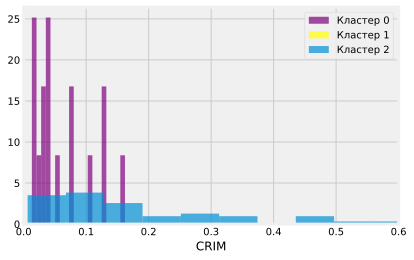

In [47]:
plt.hist(X_test.loc[labels_test==0, 'CRIM'], bins = 20, density = True, alpha = 0.7, color='purple')
plt.hist(X_test.loc[labels_test==1, 'CRIM'], bins = 20, density = True, alpha = 0.7, color='yellow')
plt.hist(X_test.loc[labels_test==2, 'CRIM'], bins = 20, density = True, alpha = 0.7)
plt.xlim(0, 0.6)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')